In [5]:
import torch as t
from einops import rearrange, repeat
import matplotlib.pyplot as plt


In [28]:
##Prove that the transpose of the transpose of a matrix is the matrix itself:
A = t.rand(size=(5,6))
print(A)
t.transpose(t.transpose(A,1,0),1,0) == A
A.T == t.transpose(A,1,0)

tensor([[0.3755, 0.8425, 0.0488, 0.5011, 0.1906, 0.0832],
        [0.1651, 0.0321, 0.1337, 0.6341, 0.0354, 0.2502],
        [0.3901, 0.7079, 0.3173, 0.4686, 0.9175, 0.3379],
        [0.8120, 0.6763, 0.8213, 0.4784, 0.3264, 0.5488],
        [0.3081, 0.4041, 0.8382, 0.0494, 0.1068, 0.3110]])


tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [39]:
assert A.mean() == A.sum()/A.numel()
A.mean(dim = 0)== A.sum(dim=0)/A.shape[0]

tensor([True, True, True, True, True, True])

In [45]:
#Broadcast a sum to keep the shape
A_sum = A.sum(dim = 1, keepdims= True)
(A/A_sum).sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [61]:
## dot product 

a = t.rand((5,))
b = t.rand((5,))
t.dot(a,b), t.sum(a*b), t.dot(b,a)

(tensor(0.2958), tensor(0.2958), tensor(0.2958))

In [68]:
## matrix
dims = A.shape
B = t.rand((dims[1],dims[0]))
assert B.T.shape == A.shape

A@B - t.einsum("ij,jk-> ik",A,B)

tensor([[ 0.0000e+00,  0.0000e+00, -1.1921e-07,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  2.9802e-08,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.1921e-07,  0.0000e+00, -1.1921e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [86]:
## norms 
## l2 norm - Euclidean distance 
assert t.norm(a) == (a**2).sum().sqrt()
print(t.norm(A) - (A**2).sum().sqrt())
## l1 norm - actual (summed) distance
t.abs(a).sum()

tensor(-2.3842e-07)


tensor(1.7432)

In [88]:
## The sum and transpose commute: 
A2 = t.rand(dims)
A.T + A2.T == (A+A2).T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [100]:
X = t.arange(24).reshape(2, 3, 4)
nX = X.shape
assert len(X) == X.shape[0]
    
print(X.sum(dim=0).shape == (nX[1], nX[2]))
print(X.sum(dim=1).shape == (nX[0], nX[2]))
print(X.sum(dim=2).shape == (nX[0], nX[1]))


True
True
True


In [107]:
import numpy as np
np.linalg.norm(X), (X**2).sum().sqrt()

(65.75712889109438, tensor(65.7571))

In [116]:
AA = t.rand((100,200))
BB = t.rand((100,200))
CC = t.rand((100,200))
stacked = t.stack([AA,BB,CC])
assert stacked.shape == (3,100,200)

stacked[1] ==BB

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [ ]:

### PCA : re-express a high-dim dataset (features) in terms of a lower dimensional dataset with minimal information loss

#As an example, consider 2d data 
X = t.tensor([[.3,.5],[.4,.3],[.7,.4],[.5,.7],[.3,.2],[.9,.8],[.1,.2],[.2,.5],[.6,.9],[.2,.2],[.6,.8],[.4,.6],[.3,.4],[.6,.5],[.8,.5],[.8,.9],[.2,.3],[.7,.7],[.5,.5],[.6,.4]])
# subtract the mean to normalize it 
print(X.mean(axis=0),len(X))
X_0 = X - X.mean()
assert X_0.mean() == 0
## should be centered around 0 
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_0[:,0],X_0[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(["un-normalized","normalized"])

In [140]:
## Compute the variance between the random variables X1 and X2

# test = t.tensor([[0, 2], [1, 1], [2, 0]],dtype=t.float32)
# n = test.shape[0]
# # mean_test = test.mean(dim=0)
# test = (test -  test.mean(axis=0)).T
# assert test.mean() == 0
# cov_test = t.tensor([[t.sum(test[i]*test[j])/(n-1) for j in range(2)] for i in range(2)])
# t.cov(test) - cov_test

n = len(X_0)
# positive covariance for all cases: direct relationship between the random variables
## This gives a measure for the linear dependence 
var_2 = t.tensor([[t.sum(X_0.T[i]*X_0.T[j])/(n-1) for j in range(2)] for i in range(2)])
var_2 - t.cov(X_0.T)




tensor([[ 0.0002, -0.0002],
        [-0.0002,  0.0002]])

/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_45580/1164615305.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vecs = t.tensor(vecs, dtype = t.float32)


torch.return_types.linalg_eig(
eigenvalues=tensor([0.0885+0.j, 0.0163+0.j]),
eigenvectors=tensor([[ 0.7224+0.j, -0.6915+0.j],
        [ 0.6915+0.j,  0.7224+0.j]]))

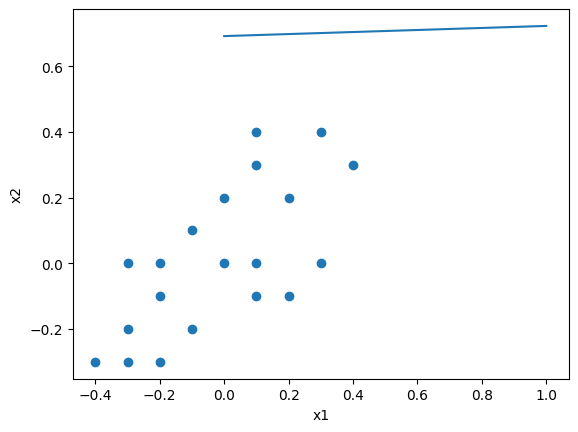

In [195]:
## Find eigenvectors - the ones whose directions remain unchanged after any linear transformation 
### number of eigenvectors == number of dimensions 
## project data onto principal directions


C = t.cov(X_0.T)
vals, vecs = t.linalg.eig(C)
vecs.T.shape, X_0.T.shape
vecs = t.tensor(vecs, dtype = t.float32)
t.einsum("ij,jk -> ik",vecs.T,X_0.T).T

plt.plot(vecs[1])
plt.scatter(X_0[:,0],X_0[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
t.linalg.eig(C)



In [190]:
XX = t.tensor([[-2,-2],[0,0],[2,2]],dtype = t.float)
C = t.cov(XX.T)
vals, vecs = t.linalg.eig(C)
vecs.T.shape, XX.T.shape
vecs = t.tensor(vecs, dtype = t.float32)
t.einsum("ij,jk -> ik",vecs.T,XX.T).T



/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_45580/471845227.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vecs = t.tensor(vecs, dtype = t.float32)


tensor([[-2.8284,  0.0000],
        [ 0.0000,  0.0000],
        [ 2.8284,  0.0000]])